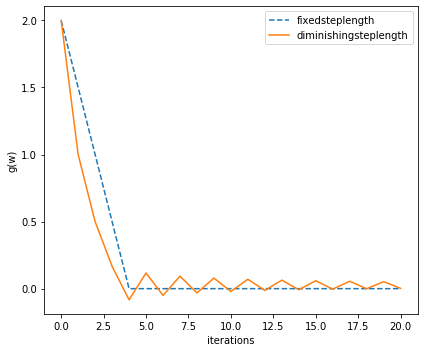

In [3]:
# import autograd functionality
import autograd.numpy as np
from autograd.util import quick_grad_check
from autograd import grad as compute_grad
from autograd.misc.flatten import flatten_func

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's
# tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
# write the derivative function
def gradient_descent(g, w, alpha, beta, max_its, fixed_step):
	#flatten the input function, create gradient based on flat function
	g_flat, unflatten, w = flatten_func(g, w)
	grad = compute_grad(g_flat)

	# record history
	w_hist = []
	w_hist.append(unflatten(w))

	# start gradient descent loop
	z = np.zeros((np.shape(w))) # momentum term

	# over the line
	for k in range(max_its):
		# plug in value into func and derivative
		grad_eval = grad(w)
		grad_eval.shape = np.shape(w)
		# take descent step with momentum
		z = beta * z + grad_eval
		if fixed_step == True:
			w = w - alpha * z
		else:
			w = w - 2 * alpha/(k+1) * z
		# record weight update
		w_hist.append(unflatten(w))

	return w_hist

# write the cost function
def cost_function(w):
	return np.abs(w)

# plot the cost_function history figure
def history_plot(costfunction_history_1, costfunction_history_2):
	figure, axes = plt.subplots(1,1, figsize = (6,5))
	axes.plot(range(len(costfunction_history_1)),costfunction_history_1, label = "fixedsteplength", linestyle = "dashed")
	axes.plot(range(len(costfunction_history_2)),costfunction_history_2, label = "diminishingsteplength", linestyle = "solid")
	axes.set_xlabel("iterations")
	axes.set_ylabel("g(w)")
	axes.legend()
	plt.show()

if __name__ == "__main__":
	# set those parameters
	w_initial = float(2)
	alpha = 0.5
	max_its = 20
	weight_history_1 = gradient_descent(cost_function, w_initial, alpha, beta = 0,max_its = max_its, fixed_step = True)
	weight_history_2 = gradient_descent(cost_function, w_initial, alpha, beta = 0,max_its = max_its, fixed_step = False)
	history_plot(weight_history_1,weight_history_2)


In [ ]:
The plot aboe shows the comparison of two steplengths, the diminishingsteplength line will
remain a "wave" when it had reached nearly minimum value， but the Amplitude is becoming 
gradually smaller.
In the vibarating part, the peak is above the 0-value-line and the bottom is below the line.